In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [50]:
x=pd.read_csv('/content/X_train.csv')
y=pd.read_csv('/content/Y_train (2).csv')
df=pd.concat([x,y],axis=1)

In [51]:
df.columns

Index(['Product category', 'Product subcategory', 'Product rating',
       'Transaction number', 'Transaction date', 'Customer ID', 'Seller ID',
       'Base Price', 'Discounts percentage', 'Service charge percentage',
       'Product ID', 'Total amount per unit', 'Age', 'State code',
       'Income annual', 'Occupation level', 'Income annual.1',
       'Product score 1', 'Product score 2', 'Quantity'],
      dtype='object')

In [52]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2400 entries, 0 to 2399
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
375 non-null    float64
dtypes: float64(1)
memory usage: 18.9 KB


In [53]:
df['Income annual.1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2400 entries, 0 to 2399
Series name: Income annual.1
Non-Null Count  Dtype  
--------------  -----  
375 non-null    float64
dtypes: float64(1)
memory usage: 18.9 KB


In [54]:
df['State code'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2400 entries, 0 to 2399
Series name: State code
Non-Null Count  Dtype  
--------------  -----  
375 non-null    float64
dtypes: float64(1)
memory usage: 18.9 KB


In [55]:
df=df[df['Age']>0].reset_index(drop=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product category           372 non-null    object 
 1   Product subcategory        371 non-null    object 
 2   Product rating             368 non-null    float64
 3   Transaction number         375 non-null    int64  
 4   Transaction date           375 non-null    object 
 5   Customer ID                375 non-null    int64  
 6   Seller ID                  375 non-null    int64  
 7   Base Price                 375 non-null    float64
 8   Discounts percentage       374 non-null    float64
 9   Service charge percentage  373 non-null    float64
 10  Product ID                 369 non-null    float64
 11  Total amount per unit      373 non-null    float64
 12  Age                        375 non-null    float64
 13  State code                 375 non-null    float64

In [57]:
df.isnull().sum()

Product category               3
Product subcategory            4
Product rating                 7
Transaction number             0
Transaction date               0
Customer ID                    0
Seller ID                      0
Base Price                     0
Discounts percentage           1
Service charge percentage      2
Product ID                     6
Total amount per unit          2
Age                            0
State code                     0
Income annual                375
Occupation level               0
Income annual.1                0
Product score 1                0
Product score 2                0
Quantity                       4
dtype: int64

In [58]:
df=df.drop(columns='Income annual')

In [59]:
df=df.rename(columns=({'Income annual.1':'Income annual'}))

In [60]:
df.columns

Index(['Product category', 'Product subcategory', 'Product rating',
       'Transaction number', 'Transaction date', 'Customer ID', 'Seller ID',
       'Base Price', 'Discounts percentage', 'Service charge percentage',
       'Product ID', 'Total amount per unit', 'Age', 'State code',
       'Occupation level', 'Income annual', 'Product score 1',
       'Product score 2', 'Quantity'],
      dtype='object')

In [61]:
df.head()

,Product category,Product subcategory,Product rating,Transaction number,Transaction date,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Age,State code,Occupation level,Income annual,Product score 1,Product score 2,Quantity
0,C2,SC2,3.0,696757,09-04-2022,289082,702163,30.66,0.60,1.69,95.0,30.994194,43.0,7.0,2.0,945859.0,51.990,0.0,3.0
1,C4,SC3,4.0,173365,13-03-2022,911835,435856,31.75,0.84,1.49,254.0,31.956375,47.0,18.0,1.0,500559.0,55.625,-0.2,65.0
2,C2,SC1,4.0,289653,21-06-2022,716655,800480,32.09,0.44,1.25,84.0,32.349929,56.0,3.0,3.0,527656.0,56.135,1.8,9.0
3,C1,SC1,1.0,253529,23-08-2022,445218,435856,45.15,1.44,1.87,16.0,45.344145,51.0,16.0,2.0,888715.0,69.725,-6.2,13.0
4,C1,SC1,7.0,400356,08-05-2022,370588,194273,59.47,1.10,1.05,14.0,59.440265,24.0,22.0,2.0,833500.0,103.205,1.5,17.0


In [62]:
df['Occupation level'].value_counts()

Occupation level
2.0    167
1.0    154
3.0     54
Name: count, dtype: int64

In [63]:
df['Customer ID'].nunique()

96

In [64]:
df['Age'].nunique()

38

In [65]:
cust = df.groupby('Customer ID').agg({
    'Product rating': 'mean',
    'Base Price': 'mean',
    'Discounts percentage': 'mean',
    'Service charge percentage': 'mean',
    'Total amount per unit': 'mean',
    'Age': 'mean',
    'Occupation level': 'mean',
    'Income annual': 'mean',
    'Product score 1': 'mean',
    'Product score 2': 'mean',
    'Quantity': 'sum',  # Sum quantity for total products purchased
    'Transaction number': 'count'  # Count transactions per customer
}).reset_index()

In [66]:
cust

,Customer ID,Product rating,Base Price,Discounts percentage,Service charge percentage,Total amount per unit,Age,Occupation level,Income annual,Product score 1,Product score 2,Quantity,Transaction number
0,110017,3.400000,39.958000,0.78200,1.286000,40.155881,48.0,3.0,584068.0,66.737000,-0.510000,128.0,5
1,119580,3.666667,32.702500,0.79750,1.485000,37.525280,44.0,1.0,919191.0,59.053750,1.012500,63.0,4
2,124424,2.875000,47.698750,1.08125,1.208750,47.729081,49.0,2.0,929483.0,77.298125,-2.531250,184.0,8
3,147789,3.400000,46.780000,0.92600,1.326000,46.885116,50.0,3.0,538604.0,76.970000,-1.230000,70.0,5
4,148828,4.000000,35.445000,0.79500,1.270000,35.585765,63.0,1.0,902503.0,61.167500,0.025000,34.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,945105,6.500000,48.160000,0.23500,1.350000,48.717676,42.0,2.0,622259.0,85.240000,5.325000,14.0,2
92,947027,2.000000,40.833333,0.91000,1.306667,40.999980,52.0,1.0,1086643.0,68.583333,-0.883333,59.0,3
93,949073,3.800000,43.642000,0.54200,1.388000,44.062848,40.0,2.0,928008.0,73.063000,1.090000,84.0,5
94,967345,3.666667,50.893333,1.10000,1.386667,51.282740,42.0,1.0,551767.0,83.673333,-1.833333,42.0,3


In [67]:
cust.isnull().sum()

Customer ID                  0
Product rating               0
Base Price                   0
Discounts percentage         0
Service charge percentage    0
Total amount per unit        0
Age                          0
Occupation level             0
Income annual                0
Product score 1              0
Product score 2              0
Quantity                     0
Transaction number           0
dtype: int64

In [68]:
px.scatter(cust,x='Age',y='Income annual')

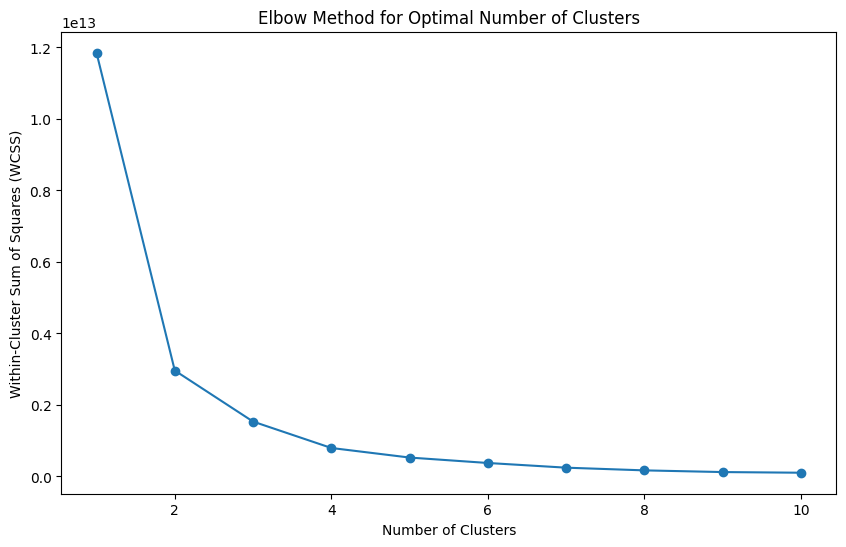

In [69]:
from sklearn.cluster import KMeans
features = ['Age', 'Income annual']

X = df[features]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

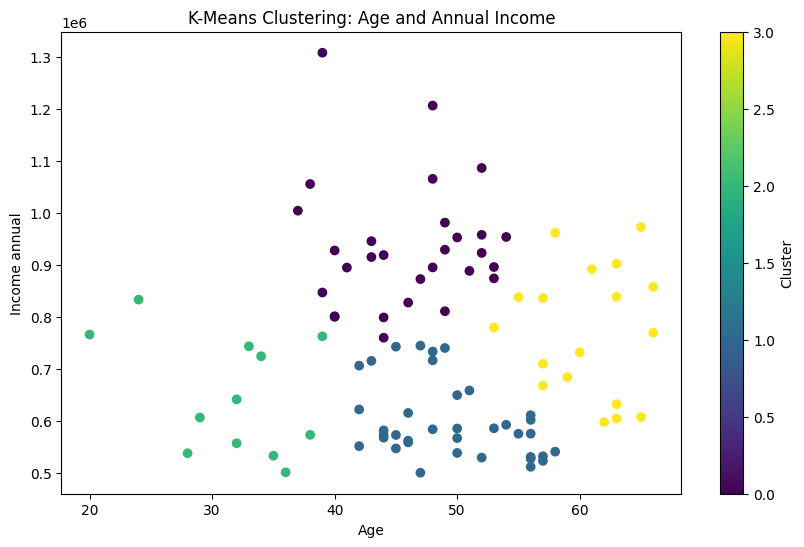

In [71]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['Age', 'Income annual']
X = cust[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters using the original data
plt.figure(figsize=(10, 6))
plt.scatter(cust['Age'], cust['Income annual'], c=clusters_kmeans, cmap='viridis', marker='o')
plt.xlabel('Age')
plt.ylabel('Income annual')
plt.title('K-Means Clustering: Age and Annual Income')
plt.colorbar(label='Cluster')
plt.show()

Here we can see 4 clustre w.r.t. annula income and age of customers. The first cluster comprise of age geoup of 20- 40 yoa thay have low to medium annual income of about of 0.4 million. second cluster of customer is of age group 40-60 yoa they share the same amount of annual income as cluster 1. third customer segment are middle aged customer with high net income of about more than 1 million. fourth segment is of elder customer with medium income.

In [73]:
df.head()

,Product category,Product subcategory,Product rating,Transaction number,Transaction date,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Age,State code,Occupation level,Income annual,Product score 1,Product score 2,Quantity
0,C2,SC2,3.0,696757,09-04-2022,289082,702163,30.66,0.60,1.69,95.0,30.994194,43.0,7.0,2.0,945859.0,51.990,0.0,3.0
1,C4,SC3,4.0,173365,13-03-2022,911835,435856,31.75,0.84,1.49,254.0,31.956375,47.0,18.0,1.0,500559.0,55.625,-0.2,65.0
2,C2,SC1,4.0,289653,21-06-2022,716655,800480,32.09,0.44,1.25,84.0,32.349929,56.0,3.0,3.0,527656.0,56.135,1.8,9.0
3,C1,SC1,1.0,253529,23-08-2022,445218,435856,45.15,1.44,1.87,16.0,45.344145,51.0,16.0,2.0,888715.0,69.725,-6.2,13.0
4,C1,SC1,7.0,400356,08-05-2022,370588,194273,59.47,1.10,1.05,14.0,59.440265,24.0,22.0,2.0,833500.0,103.205,1.5,17.0


In [74]:
px.scatter(df,x='State code',y='Age')

Majority of the population between range of 35 years to 60 years of age. The customer age group are spread uniformly.

In [75]:
px.scatter(cust,x='Occupation level',y='Income annual')

High Income individual customers

In [76]:
df[df['Income annual']>1100000]

,Product category,Product subcategory,Product rating,Transaction number,Transaction date,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Age,State code,Occupation level,Income annual,Product score 1,Product score 2,Quantity
15,C4,SC1,4.0,894037,23-07-2022,312934,709568,59.95,1.01,1.83,214.0,60.441590,48.0,28.0,2.0,1206665.0,97.925,-1.05,9.0
26,C2,SC1,2.0,144775,16-05-2022,485448,647438,45.47,0.71,1.49,86.0,45.824666,39.0,10.0,1.0,1308337.0,72.205,-1.55,16.0
59,C3,SC2,2.0,261651,30-05-2022,485448,569028,33.24,1.29,1.19,176.0,33.206760,39.0,10.0,1.0,1308337.0,53.860,-4.45,3.0
222,C1,NaN,4.0,734898,20-03-2022,485448,730238,28.70,1.58,1.18,24.0,28.585200,39.0,10.0,1.0,1308337.0,51.050,-3.90,4.0
289,C4,SC2,3.0,718905,25-08-2022,485448,730238,17.86,2.51,1.31,233.0,17.645680,39.0,10.0,1.0,1308337.0,32.790,-9.55,17.0
293,C2,SC3,3.0,971517,20-03-2022,485448,928785,27.20,1.63,1.24,115.0,27.093920,39.0,10.0,1.0,1308337.0,46.800,-5.15,8.0
321,C3,SC1,4.0,711789,31-05-2022,312934,672428,60.79,0.43,1.02,148.0,61.148661,48.0,28.0,2.0,1206665.0,99.185,1.85,43.0


There are only two customer wiht net annual income of more than 1 million.

Mean of every occupation level

In [77]:
y=df.groupby('Occupation level')['Income annual'].mean().reset_index()
y

,Occupation level,Income annual
0,1.0,755344.149351
1,2.0,749377.592814
2,3.0,690149.333333


In [78]:
cust.head()

,Customer ID,Product rating,Base Price,Discounts percentage,Service charge percentage,Total amount per unit,Age,Occupation level,Income annual,Product score 1,Product score 2,Quantity,Transaction number
0,110017,3.400000,39.95800,0.78200,1.28600,40.155881,48.0,3.0,584068.0,66.737000,-0.51000,128.0,5
1,119580,3.666667,32.70250,0.79750,1.48500,37.525280,44.0,1.0,919191.0,59.053750,1.01250,63.0,4
2,124424,2.875000,47.69875,1.08125,1.20875,47.729081,49.0,2.0,929483.0,77.298125,-2.53125,184.0,8
3,147789,3.400000,46.78000,0.92600,1.32600,46.885116,50.0,3.0,538604.0,76.970000,-1.23000,70.0,5
4,148828,4.000000,35.44500,0.79500,1.27000,35.585765,63.0,1.0,902503.0,61.167500,0.02500,34.0,4


In [79]:
cust['Total amount']=cust['Total amount per unit']*cust['Quantity']
cust=cust.drop(columns='Total amount per unit')

In [80]:
px.scatter(cust,x='Age',y='Total amount')

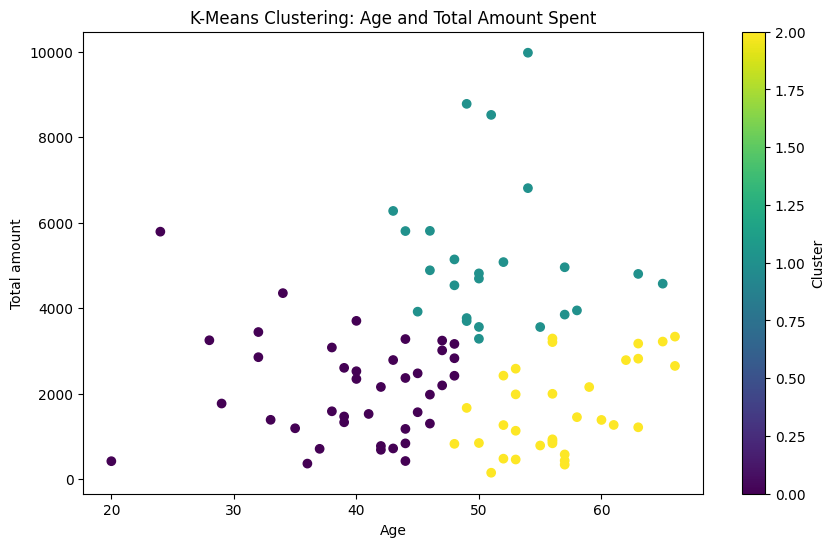

In [81]:
# Select relevant features for clustering
features = ['Age', 'Total amount']
X = cust[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters using the original data
plt.figure(figsize=(10, 6))
plt.scatter(cust['Age'], cust['Total amount'], c=clusters_kmeans, cmap='viridis', marker='o')
plt.xlabel('Age')
plt.ylabel('Total amount')
plt.title('K-Means Clustering: Age and Total Amount Spent')
plt.colorbar(label='Cluster')
plt.show()

when customers are segmented based on their age and total amount spent per transaction. first cluster contains customers of age up to 50 yoa and low to medium spend of below 6000 units. second customer segment is elderly customers with low spend amount of below of 4000 units . the third customer segment is of middle aged customer with mid to high sepnd of between 4000 to 10000.

In [82]:
cust

,Customer ID,Product rating,Base Price,Discounts percentage,Service charge percentage,Age,Occupation level,Income annual,Product score 1,Product score 2,Quantity,Transaction number,Total amount
0,110017,3.400000,39.958000,0.78200,1.286000,48.0,3.0,584068.0,66.737000,-0.510000,128.0,5,5139.952768
1,119580,3.666667,32.702500,0.79750,1.485000,44.0,1.0,919191.0,59.053750,1.012500,63.0,4,2364.092661
2,124424,2.875000,47.698750,1.08125,1.208750,49.0,2.0,929483.0,77.298125,-2.531250,184.0,8,8782.150881
3,147789,3.400000,46.780000,0.92600,1.326000,50.0,3.0,538604.0,76.970000,-1.230000,70.0,5,3281.958120
4,148828,4.000000,35.445000,0.79500,1.270000,63.0,1.0,902503.0,61.167500,0.025000,34.0,4,1209.916010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,945105,6.500000,48.160000,0.23500,1.350000,42.0,2.0,622259.0,85.240000,5.325000,14.0,2,682.047471
92,947027,2.000000,40.833333,0.91000,1.306667,52.0,1.0,1086643.0,68.583333,-0.883333,59.0,3,2418.998800
93,949073,3.800000,43.642000,0.54200,1.388000,40.0,2.0,928008.0,73.063000,1.090000,84.0,5,3701.279215
94,967345,3.666667,50.893333,1.10000,1.386667,42.0,1.0,551767.0,83.673333,-1.833333,42.0,3,2153.875094


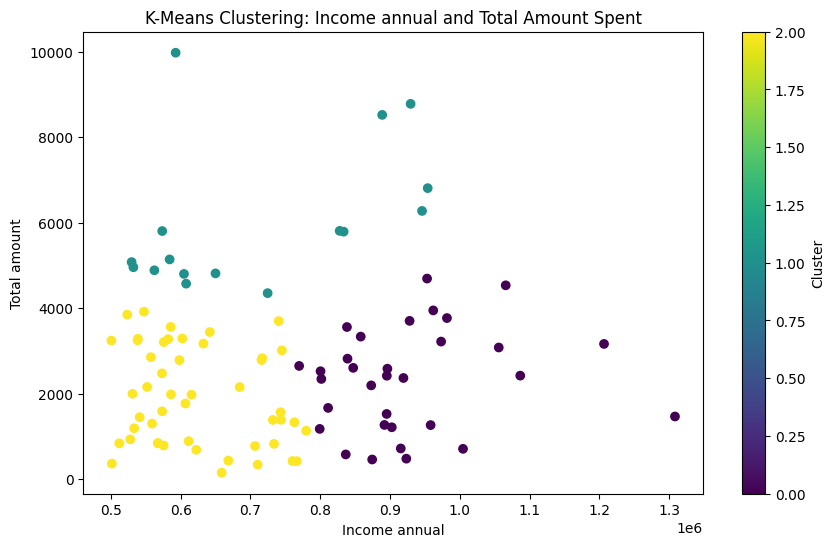

In [83]:
# Select relevant features for clustering
features = [ 'Income annual','Total amount']
X = cust[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters using the original data
plt.figure(figsize=(10, 6))
plt.scatter(cust['Income annual'], cust['Total amount'], c=clusters_kmeans, cmap='viridis', marker='o')
plt.xlabel('Income annual')
plt.ylabel('Total amount')
plt.title('K-Means Clustering: Income annual and Total Amount Spent')
plt.colorbar(label='Cluster')
plt.show()

when customer segmented based on annual income and total amount spend on a transaction.we have three clusters 1st low to medium income and low spend. second mid to high income but low spend. third is low to medium income but high spend.

In [84]:
cust.head()

,Customer ID,Product rating,Base Price,Discounts percentage,Service charge percentage,Age,Occupation level,Income annual,Product score 1,Product score 2,Quantity,Transaction number,Total amount
0,110017,3.400000,39.95800,0.78200,1.28600,48.0,3.0,584068.0,66.737000,-0.51000,128.0,5,5139.952768
1,119580,3.666667,32.70250,0.79750,1.48500,44.0,1.0,919191.0,59.053750,1.01250,63.0,4,2364.092661
2,124424,2.875000,47.69875,1.08125,1.20875,49.0,2.0,929483.0,77.298125,-2.53125,184.0,8,8782.150881
3,147789,3.400000,46.78000,0.92600,1.32600,50.0,3.0,538604.0,76.970000,-1.23000,70.0,5,3281.958120
4,148828,4.000000,35.44500,0.79500,1.27000,63.0,1.0,902503.0,61.167500,0.02500,34.0,4,1209.916010


In [85]:
age_occ=cust.groupby('Occupation level')['Age'].mean().reset_index()
age_occ

,Occupation level,Age
0,1.0,47.976190
1,2.0,47.725000
2,3.0,51.142857


In [86]:
sepnd_occ=cust.groupby('Occupation level')['Total amount'].mean().reset_index()
sepnd_occ

,Occupation level,Total amount
0,1.0,2275.420187
1,2.0,3149.119412
2,3.0,2921.343978


In [87]:
cust

,Customer ID,Product rating,Base Price,Discounts percentage,Service charge percentage,Age,Occupation level,Income annual,Product score 1,Product score 2,Quantity,Transaction number,Total amount
0,110017,3.400000,39.958000,0.78200,1.286000,48.0,3.0,584068.0,66.737000,-0.510000,128.0,5,5139.952768
1,119580,3.666667,32.702500,0.79750,1.485000,44.0,1.0,919191.0,59.053750,1.012500,63.0,4,2364.092661
2,124424,2.875000,47.698750,1.08125,1.208750,49.0,2.0,929483.0,77.298125,-2.531250,184.0,8,8782.150881
3,147789,3.400000,46.780000,0.92600,1.326000,50.0,3.0,538604.0,76.970000,-1.230000,70.0,5,3281.958120
4,148828,4.000000,35.445000,0.79500,1.270000,63.0,1.0,902503.0,61.167500,0.025000,34.0,4,1209.916010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,945105,6.500000,48.160000,0.23500,1.350000,42.0,2.0,622259.0,85.240000,5.325000,14.0,2,682.047471
92,947027,2.000000,40.833333,0.91000,1.306667,52.0,1.0,1086643.0,68.583333,-0.883333,59.0,3,2418.998800
93,949073,3.800000,43.642000,0.54200,1.388000,40.0,2.0,928008.0,73.063000,1.090000,84.0,5,3701.279215
94,967345,3.666667,50.893333,1.10000,1.386667,42.0,1.0,551767.0,83.673333,-1.833333,42.0,3,2153.875094


In [88]:
px.scatter(cust,x='Product rating',y='Total amount')

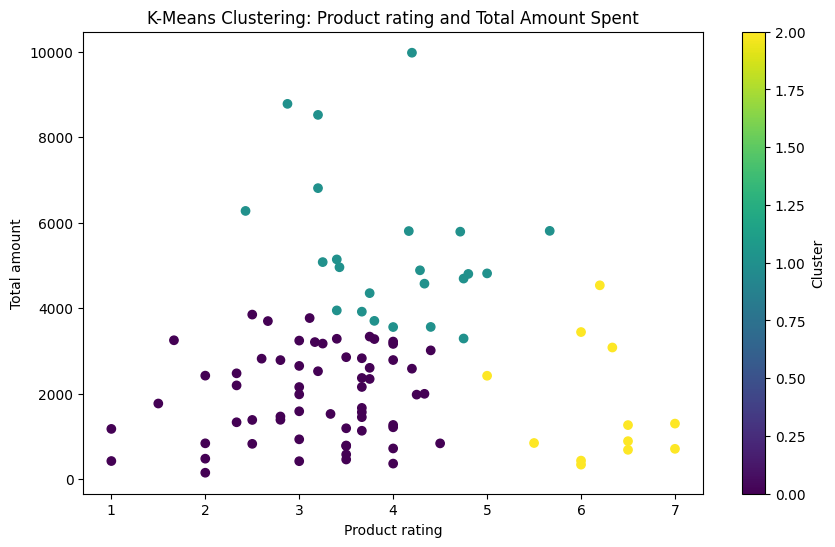

In [89]:
# Select relevant features for clustering
features = [ 'Product rating','Total amount']
X = cust[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters using the original data
plt.figure(figsize=(10, 6))
plt.scatter(cust['Product rating'], cust['Total amount'], c=clusters_kmeans, cmap='viridis', marker='o')
plt.xlabel('Product rating')
plt.ylabel('Total amount')
plt.title('K-Means Clustering: Product rating and Total Amount Spent')
plt.colorbar(label='Cluster')
plt.show()

when transactions are clustered based total amount spend and product rating. there are three clusters the first of low to medium rating of below 4 and low transaction. Second is high product rating but low sepnd. and third is medium product rating but spend of more than 4000 per transaction.

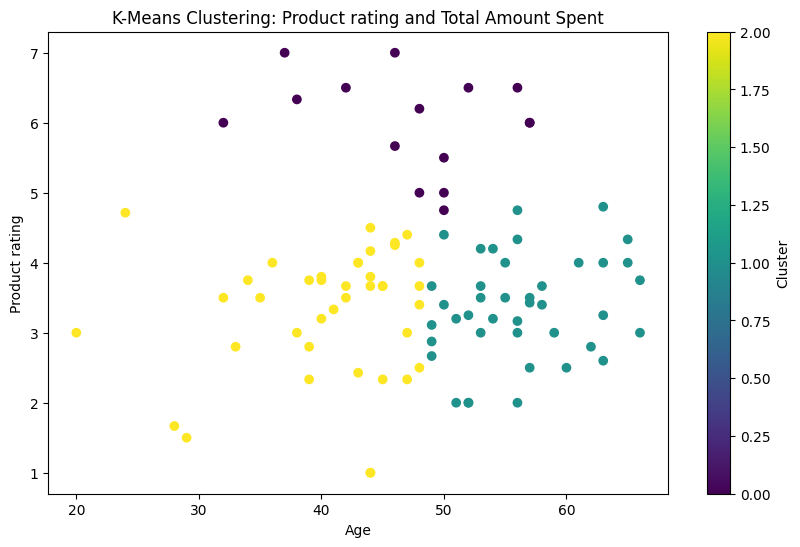

In [90]:
# Select relevant features for clustering
features = [ 'Product rating','Age']
X = cust[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters using the original data
plt.figure(figsize=(10, 6))
plt.scatter( cust['Age'], cust['Product rating'],c=clusters_kmeans, cmap='viridis', marker='o')
plt.ylabel('Product rating')
plt.xlabel('Age')
plt.title('K-Means Clustering: Product rating and Total Amount Spent')
plt.colorbar(label='Cluster')
plt.show()

when customers are segmented based on their age and rating of products they have purchased. three segment 1st is of low to medium aged customer which have bought products below rating 5. Second is of elderly customer of age group above 50 yoa they have mostly purchased products within the bracket of rating 2 to 5. the is middle aged customer who have madde purchased of products with high rating only.

In [92]:
cust.head()

,Customer ID,Product rating,Base Price,Discounts percentage,Service charge percentage,Age,Occupation level,Income annual,Product score 1,Product score 2,Quantity,Transaction number,Total amount
0,110017,3.400000,39.95800,0.78200,1.28600,48.0,3.0,584068.0,66.737000,-0.51000,128.0,5,5139.952768
1,119580,3.666667,32.70250,0.79750,1.48500,44.0,1.0,919191.0,59.053750,1.01250,63.0,4,2364.092661
2,124424,2.875000,47.69875,1.08125,1.20875,49.0,2.0,929483.0,77.298125,-2.53125,184.0,8,8782.150881
3,147789,3.400000,46.78000,0.92600,1.32600,50.0,3.0,538604.0,76.970000,-1.23000,70.0,5,3281.958120
4,148828,4.000000,35.44500,0.79500,1.27000,63.0,1.0,902503.0,61.167500,0.02500,34.0,4,1209.916010


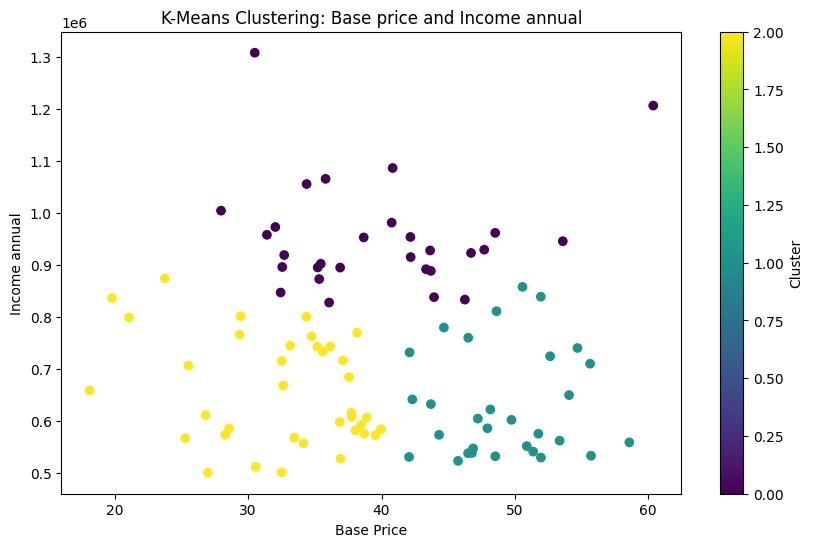

In [95]:
# Select relevant features for clustering
features = [ 'Base Price','Income annual']
X = cust[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters using the original data
plt.figure(figsize=(10, 6))
plt.scatter( cust['Base Price'], cust['Income annual'],c=clusters_kmeans, cmap='viridis', marker='o')
plt.xlabel('Base Price')
plt.ylabel('Income annual')
plt.title('K-Means Clustering: Base price and Income annual')
plt.colorbar(label='Cluster')
plt.show()

In [96]:
df.head()

,Product category,Product subcategory,Product rating,Transaction number,Transaction date,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Age,State code,Occupation level,Income annual,Product score 1,Product score 2,Quantity
0,C2,SC2,3.0,696757,09-04-2022,289082,702163,30.66,0.60,1.69,95.0,30.994194,43.0,7.0,2.0,945859.0,51.990,0.0,3.0
1,C4,SC3,4.0,173365,13-03-2022,911835,435856,31.75,0.84,1.49,254.0,31.956375,47.0,18.0,1.0,500559.0,55.625,-0.2,65.0
2,C2,SC1,4.0,289653,21-06-2022,716655,800480,32.09,0.44,1.25,84.0,32.349929,56.0,3.0,3.0,527656.0,56.135,1.8,9.0
3,C1,SC1,1.0,253529,23-08-2022,445218,435856,45.15,1.44,1.87,16.0,45.344145,51.0,16.0,2.0,888715.0,69.725,-6.2,13.0
4,C1,SC1,7.0,400356,08-05-2022,370588,194273,59.47,1.10,1.05,14.0,59.440265,24.0,22.0,2.0,833500.0,103.205,1.5,17.0


In [97]:
cat_age=df.groupby('Product category')['Age'].mean().reset_index()
cat_age

,Product category,Age
0,C1,48.000000
1,C2,49.318966
2,C3,49.836066
3,C4,48.204082
4,C5,48.300000


In [98]:
subcat_age=df.groupby('Product subcategory')['Age'].mean().reset_index()
subcat_age

,Product subcategory,Age
0,SC1,49.052910
1,SC2,48.276923
2,SC3,49.211538


In [99]:
cat_income=df.groupby('Product category')['Income annual'].mean().reset_index()
cat_income

,Product category,Income annual
0,C1,739847.444444
1,C2,725351.758621
2,C3,744666.377049
3,C4,798823.285714
4,C5,750215.100000


In [100]:
subcat_income=df.groupby('Product subcategory')['Income annual'].mean().reset_index()
subcat_income

,Product subcategory,Income annual
0,SC1,738546.291005
1,SC2,754536.400000
2,SC3,725739.769231


In [102]:
cust

,Customer ID,Product rating,Base Price,Discounts percentage,Service charge percentage,Age,Occupation level,Income annual,Product score 1,Product score 2,Quantity,Transaction number,Total amount
0,110017,3.400000,39.958000,0.78200,1.286000,48.0,3.0,584068.0,66.737000,-0.510000,128.0,5,5139.952768
1,119580,3.666667,32.702500,0.79750,1.485000,44.0,1.0,919191.0,59.053750,1.012500,63.0,4,2364.092661
2,124424,2.875000,47.698750,1.08125,1.208750,49.0,2.0,929483.0,77.298125,-2.531250,184.0,8,8782.150881
3,147789,3.400000,46.780000,0.92600,1.326000,50.0,3.0,538604.0,76.970000,-1.230000,70.0,5,3281.958120
4,148828,4.000000,35.445000,0.79500,1.270000,63.0,1.0,902503.0,61.167500,0.025000,34.0,4,1209.916010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,945105,6.500000,48.160000,0.23500,1.350000,42.0,2.0,622259.0,85.240000,5.325000,14.0,2,682.047471
92,947027,2.000000,40.833333,0.91000,1.306667,52.0,1.0,1086643.0,68.583333,-0.883333,59.0,3,2418.998800
93,949073,3.800000,43.642000,0.54200,1.388000,40.0,2.0,928008.0,73.063000,1.090000,84.0,5,3701.279215
94,967345,3.666667,50.893333,1.10000,1.386667,42.0,1.0,551767.0,83.673333,-1.833333,42.0,3,2153.875094


In [109]:
state_cat=df.groupby('Product category')['State code'].value_counts().reset_index()
state_cat.sort_values(by='count',ascending=False)

,Product category,State code,count
0,C1,17.0,14
1,C1,16.0,14
27,C2,19.0,13
2,C1,20.0,11
28,C2,17.0,11
...,...,...,...
51,C2,25.0,1
91,C4,25.0,1
92,C4,28.0,1
94,C4,23.0,1


In [115]:
c1=state_cat[state_cat['Product category']=='C1']
px.bar(c1,c1['State code'].iloc[:10],c1['count'].iloc[:10])

category 1
state code 16,17 == 14
state code 19,20 == 8,12





> Add blockquote



In [116]:
c2=state_cat[state_cat['Product category']=='C2']
px.bar(c2,c2['State code'].iloc[:10],c2['count'].iloc[:10])

category 2
state code 19 == 13
state code 17 == 11
state code 15 == 8

In [117]:
c3=state_cat[state_cat['Product category']=='C3']
px.bar(c3,c3['State code'].iloc[:10],c3['count'].iloc[:10])

category 3

1.   state code 19 == 6
2.   state code 16,8 == 5



In [118]:
c4=state_cat[state_cat['Product category']=='C4']
px.bar(c4,c4['State code'].iloc[:10],c4['count'].iloc[:10])

category 4

1.   state code 20 == 6
2.   state code 16,18 == 4



In [119]:
c5=state_cat[state_cat['Product category']=='C5']
px.bar(c5,c5['State code'].iloc[:10],c5['count'].iloc[:10])

category 5


1.   state code 9 == 3



In [120]:
state_subcat=df.groupby('Product subcategory')['State code'].value_counts().reset_index()
state_subcat.sort_values(by='count',ascending=False)

,Product subcategory,State code,count
0,SC1,17.0,17
1,SC1,16.0,16
2,SC1,20.0,15
3,SC1,19.0,13
4,SC1,7.0,13
...,...,...,...
54,SC2,24.0,1
27,SC1,1.0,1
28,SC1,2.0,1
29,SC1,21.0,1


In [121]:
sc1=state_subcat[state_subcat['Product subcategory']=='SC1']
px.bar(sc1,sc1['State code'].iloc[:10],sc1['count'].iloc[:10])

subcategory 1


1.   state code 16,17 == 16
2.   state code 19,20,7 == 13



In [122]:
sc2=state_subcat[state_subcat['Product subcategory']=='SC2']
px.bar(sc2,sc2['State code'].iloc[:10],sc2['count'].iloc[:10])

subcategory 2


1.   state code 8,9,11,19 ==10




In [123]:
sc3=state_subcat[state_subcat['Product subcategory']=='SC3']
px.bar(sc3,sc3['State code'].iloc[:10],sc3['count'].iloc[:10])

subcategory 3


1.   state code 13,17,19 == 6


